<a href="https://colab.research.google.com/github/gnssl98/MachineLearning_Repo/blob/master/kaggle_201839486_%EC%95%88%EC%B0%BD%ED%9B%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [2]:
from google.colab import drive
drive.mount('/content/g')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/g


In [3]:
!mkdir -p ~/.kaggle
!cp "/content/g/My Drive/2020_Kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle -v

Kaggle API 1.5.4


In [5]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started      Kudos        154           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2950           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      22904            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5039           False  
connectx                                       2030-01-01 00:00:00  Getting Started  Knowledge        710           False  
nlp-getting-started                            2030-01-01 00:00:00  Getting Started      Kudos       1486           False  
competit

In [8]:
!kaggle competitions download -c titanic 

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 24.8MB/s]


### Error 발생
(Error)<br>Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.6 / client 1.5.4) 403 - Forbidden<br>
-> 뒤의 403 Forbidden을 인지하고 못하고 버전 문제인줄 알고 접근<br>
(Solution)<br>!pip install --upgrade --force-reinstall --no-deps kaggle<br>
kaggle의 버전이 1.56으로 변경 후 다시 다운로드 시도
<hr>

(Error)<br>403 - Forbidden<br>
-> 권한이 없음을 인지<br>
(Solution)<br>홈페이지에 competition에 참가 후 다운로드 ->해결
<br><br>
(Reference Site) : https://www.kaggle.com/c/rsna-intracranial-hemorrhage-detection/discussion/109520

In [7]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 1.7MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=d3769eea2c9754d78f544e347385669f8dee60bb5b7f09d6a61d5d14b2085ef1
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


titanic data가 zip형식으로 압축되어 있어서 리눅스 명령어로 해제 시도<br>


In [9]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


## 데이터 로드
Numpy, Pandas, Matpltlib 패키지 import<br>
Pands의 read_csv 모듈을 통해 데이터 로드

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

## Keras의 Data Description 에서 Data Dictionary를 캡쳐 후 저장
## 해당 이미지 파일을 Google Drive에 저장 후 IPython.Display에 Image 모듈을 사용하여 이미지를 보여준다. 




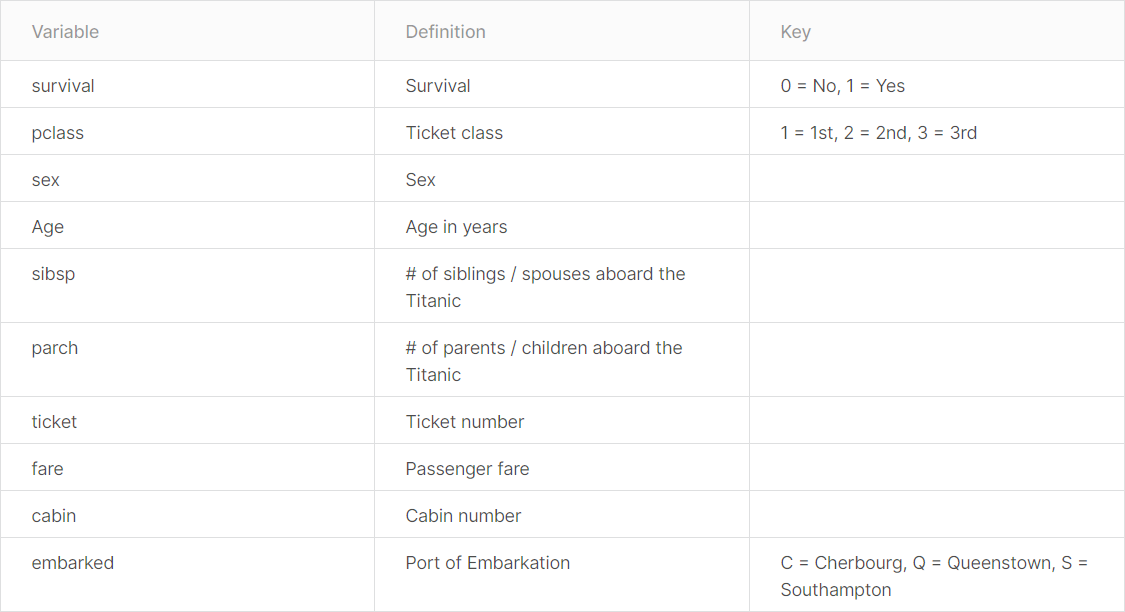

In [10]:
from IPython.display import Image 
Image(filename='/content/g/My Drive/data_dictionary.png', width=700, height=500)

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




1.   PassengerId는 고유번호로 사용 가능하다.
2.   Survived는 생존자 예측에 제일 중요한 column으로 0이면 사망 1이면 생존
3.   Pclass는 승객들의 승선 클래스를 나타낸다. 1이면 1st로 상대적으로 부유하다고 볼 수 있다.
4.   Name은 PassengerId와 마찬가지로 고유특성이다.
5.   Sex는 성별을 나타낸다.
6.   age는 나이를 나타낸다.
7.   SibSp 같이 탑승한 형제나 배우자의 수
8.   Parch 같이 탑승한 부모의 수(부, 모 따로 계산)
9.   Ticket은 승객들의 Ticket number이다.
10.  Fare은 승객들의 요금을 나타낸다.  
11.  Cabin는 탑승객의 Cabin number이다. 고유번호로 사용가능하다.
12.  Embarked는 탑승한 위치이다.



In [12]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 결측값(NULL)을 조회

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


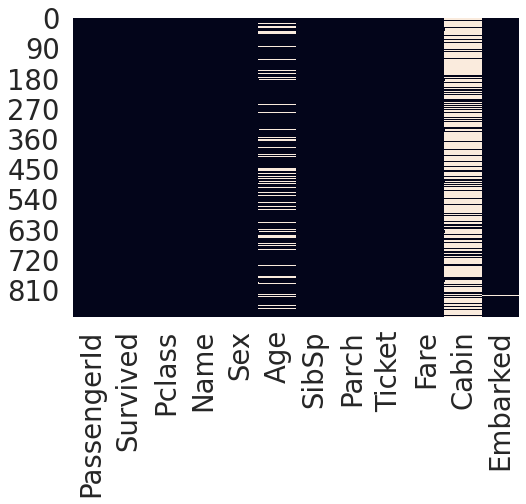

In [14]:
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

sns.heatmap(df_train.isnull(), cbar=False)

## Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 기본적인 시각화 기능은 Matplotlib 패키지에 의존한다. 
<hr>

## plt.style.use('seaborn')을 통하여 Seaborn을 적용하여 데이터를 시각화한다.
## 흰색 부분이 결측값을 나타낸다.
<hr>

## heatmap의 parameter<br>cbar : boolean, optional<br>Whether to draw a colorbar


(reference site) : https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/ (Seaborn의 정의)
: https://seaborn.pydata.org/generated/seaborn.heatmap.html (sns.heatmap의 parameter)

# Cabin의 non-null 

In [15]:
df_train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

### cabin column은 탑승객의 구별하는 용도로 사용가능하다. 하지만 결측치(Null)이 많아 사용하기 어렵다..
### 또한 결측값도 많이 있어, 모델을 학습하는데 부정적인 영향을 미치므로, 해당 column을 삭제한다.

## 'Cabin' 삭제

In [16]:
df_test.drop(['Cabin'], axis='columns', inplace=True)

In [17]:
df_train.drop(['Cabin'], axis='columns', inplace=True)

## 삭제되었는지 확인


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Categorial Feature의 분포를 보기 위해 Pie Chart를 그린다.

(reference site) : https://cyc1am3n.github.io/2018/10/09/my-first-kaggle-competition_titanic.html

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def pie_chart(feature):
  feature_ratio = df_train[feature].value_counts(sort=False)
  feature_size = feature_ratio.size
  feature_index = feature_ratio.index
  survived = df_train[df_train['Survived'] == 1][feature].value_counts()
  dead = df_train[df_train['Survived'] == 0][feature].value_counts()
  
  plt.plot(aspect='auto')
  plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
  plt.title(feature + '\'s ratio in total')
  plt.show()

  for i, index in enumerate(feature_index):
    plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
    plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
    plt.title(str(index) + '\'s ratio')
    plt.show() 

### df_train[feature].value_counts(sort=False)
### -> Count number of rows with each unique value of variable
### -> 변수에대한 유일값의 행의 갯수를 센다.


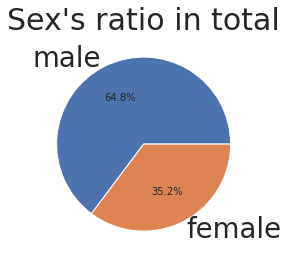

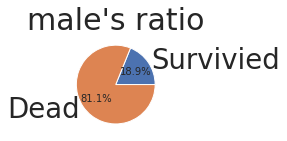

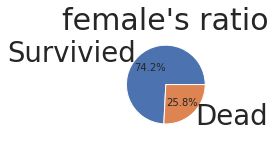

In [20]:
pie_chart('Sex')

### 데이터 전처리하는 과정에서 train과 test셋을 같은 방법으로 처리해야 하기 때문에 두 데이터를 합친 train_test 생성


In [21]:
train_test = [df_train, df_test]

# Age
### Age는 Cabin 만큼 많은 결측값을 갖고 있지 않지만, 결측치가 존재하는 Variable이다.
### 생존과 나이는 상관관계를 가질 수 있다고 생각하였다.
### 결측값에는 평균값을 넣는다.(가장 보편적인 방법)

In [22]:
for data in train_test:
  data['Age'].fillna(data['Age'].mean(), inplace=True)
  data['Age']=data['Age'].astype(int)

In [23]:
df_train['Age'].isnull

<bound method Series.isnull of 0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int64>

### Age column에 결측값이 사라진것을 볼 수 있다.

## 특성결합
### Sibsp와 Parch 특성을 Family 특성으로 결합하자
### 형제, 자매, 배우자 부모님, 자녀의 수는 비슷 한 성격을 가지므로 특성결합을 실행

In [24]:
for data in train_test:
  data["Family"] = data["SibSp"] + data["Parch"]
  data['Family'] = data['Family'].astype(int)

In [25]:
df_train['Family']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family, Length: 891, dtype: int64

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  Family       418 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 36.0+ KB


### SibSp와 Parch 특성 drop

In [27]:
df_train.drop(['SibSp', 'Parch'], axis='columns', inplace=True)
df_test.drop(['SibSp', 'Parch'], axis='columns', inplace=True)

### 승객들의 고유 번호인 Passenger id가 있으니 Name과 Ticket은 필요가 없다. 

In [28]:
df_train.drop(['Name', 'Ticket'], axis='columns', inplace=True)
df_test.drop(['Name', 'Ticket'], axis='columns', inplace=True)

## Embarked
### 해당 특성은 승객이 탑승한 항구이다.
### null 값이 두개 존재한다.

In [29]:
df_train['Embarked'].isnull().sum()

2

### Embarked의 value를 살펴보자

In [30]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### S가 가장 많으므로 2개의 결측값을 S로 채워도 무방하다고 판단했다.

In [31]:
df_train['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

### Fare 특성
### test set에서 fare이 결측값존재
### mean 값으로 채우고 int형으로 변환

In [32]:
df_test['Fare'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Fare, Length: 418, dtype: bool

In [33]:
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean()).astype(int)

In [34]:
df_train['Fare']=df_train['Fare'].astype(int)

## one-hot encoding 과 label분리
### 데이터 전처리가 끝났으므로 예측 학습을 위하여 encoding과 label을 분리 시킨다.

In [35]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

df_train_label = df_train['Survived']
df_train = df_train.drop('Survived', axis=1)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle

In [37]:
df_train.head()

,PassengerId,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22,7,1,0,1,0,0,1
1,2,1,38,71,1,1,0,1,0,0
2,3,3,26,7,0,1,0,0,0,1
3,4,1,35,53,1,1,0,0,0,1
4,5,3,35,8,0,0,1,0,0,1


In [38]:
df_test.head()

,PassengerId,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34,7,0,0,1,0,1,0
1,893,3,47,7,1,1,0,0,0,1
2,894,2,62,9,0,0,1,0,1,0
3,895,3,27,8,0,0,1,0,0,1
4,896,3,22,12,2,1,0,0,0,1


### 데이터 정렬되어 있어 학습에 방해될 우려가 있으므로 섞어준다.

In [39]:
df_train, df_train_label = shuffle(df_train, df_train_label, random_state = 5)

### Pipeline 구축

In [40]:
def pipeline(model):
  model.fit(df_train, df_train_label)
  prediction = model.predict(df_test)
  acc = round(model.score(df_train, df_train_label)* 100, 2)
  print("Acc : ", acc ,"%")
  return prediction

In [45]:
rf_pred = pipeline(RandomForestClassifier(n_estimators=100))

log_pred = pipeline(LogisticRegression())

knn_pred = pipeline(KNeighborsClassifier(n_neighbors=4))

svm_pred = pipeline(SVC())

nb_pred = pipeline(GaussianNB())

Acc :  100.0 %
Acc :  80.13 %
Acc :  74.64 %
Acc :  66.33 %
Acc :  78.9 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## RF가 과소적합된것을 볼 수 있다.
## 현재 데이터셋에서 제일 효율적인것은 로지스틱 회귀인것을 볼 수 있다.